In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


Plotting our created dataset...

Points:
( 0.3741, -0.0370)
( 0.3207, -0.3301)
(-1.4980, -0.3971)
(-0.1325, -0.0600)
( 1.4778,  0.9578)
( 0.1741,  0.3947)
( 0.2139, -0.0263)
(-0.0543,  0.0977)
(-0.2944,  0.0599)
( 0.0175,  0.0819)
...



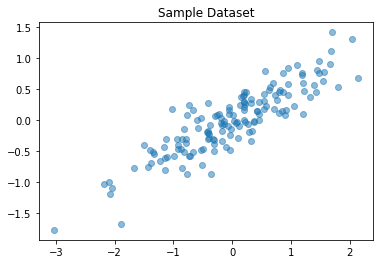

In [2]:
# A value we picked to always display the same results
# Feel free to change this to any value greater than 0 view different random value outcomes
seed = 9000

# We're using a seeded random state so we always get the same outcome
seeded_state = np.random.RandomState(seed=seed)

# Returns a random 150 points (x, y pairs) in a gaussian distribution,
# IE most of the points fall close to the average with a few outliers
rand_points = seeded_state.randn(150, 2)

# The @ operator performs matrix multiplication, and serves to bring
# our gaussian distribution points closer together
points = rand_points @ seeded_state.rand(2, 2)
x = points[:, 0]
y = points[:, 1]

# Now we have a sample dataset of 150 points to perform PCA on, so
# go ahead and display this in a plot.
plt.scatter(x, y, alpha=0.5)
plt.title("Sample Dataset")

print("Plotting our created dataset...\n")
print("Points:")
for p in points[:10, :]:
    print("({:7.4f}, {:7.4f})".format(p[0], p[1]))
print("...\n")

plt.show()

Plotting our calculated principal components...



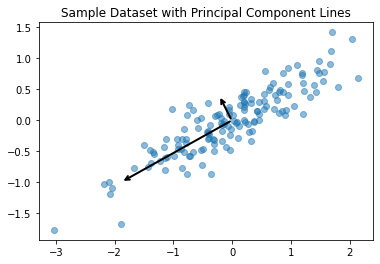

In [3]:
# Find two principal components from our given dataset
pca = PCA(n_components = 2)
pca.fit(points)

# Once we are fitted, we have access to inner mean_, components_, and explained_variance_ variables
# Use these to add some arrows to our plot
plt.scatter(x, y, alpha=0.5)
plt.title("Sample Dataset with Principal Component Lines")
for var, component in zip(pca.explained_variance_, pca.components_):
    plt.annotate(
        "",
        component * np.sqrt(var) * 2 + pca.mean_,
        pca.mean_,
        arrowprops = {
            "arrowstyle": "->",
            "linewidth": 2
        }
    )

print("Plotting our calculated principal components...\n")

plt.show()

Plotting our dataset with a dimensionality reduction...


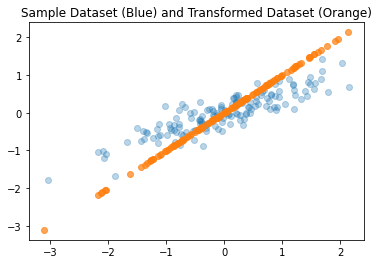

In [6]:
# Reduce the dimensionality of our data using a PCA transformation
pca = PCA(n_components = 1)
transformed_points = pca.fit_transform(points)

# Note that all the inverse transformation does is transforms the data to its original space.
# In practice, this is unnecessary. For this example, all data would be along the x axis.
# We use it here for visualization purposes
inverse = pca.inverse_transform(transformed_points)
t_x = inverse[:, 0]
t_y = inverse[:, 0]

# Plot the original and transformed data sets
plt.scatter(x, y, alpha=0.3)
plt.scatter(t_x, t_y, alpha=0.7)
plt.title("Sample Dataset (Blue) and Transformed Dataset (Orange)")

print("Plotting our dataset with a dimensionality reduction...")

plt.show()